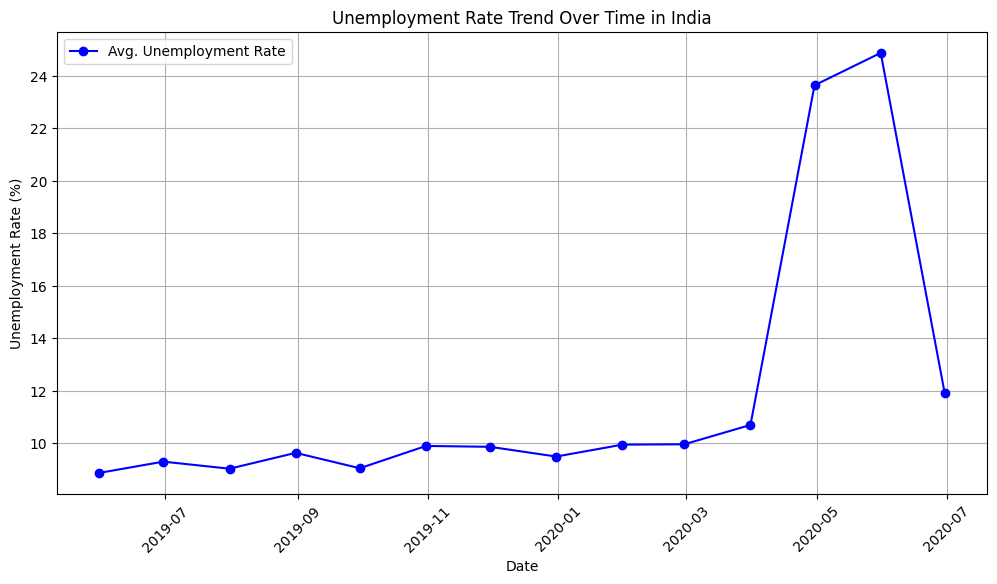

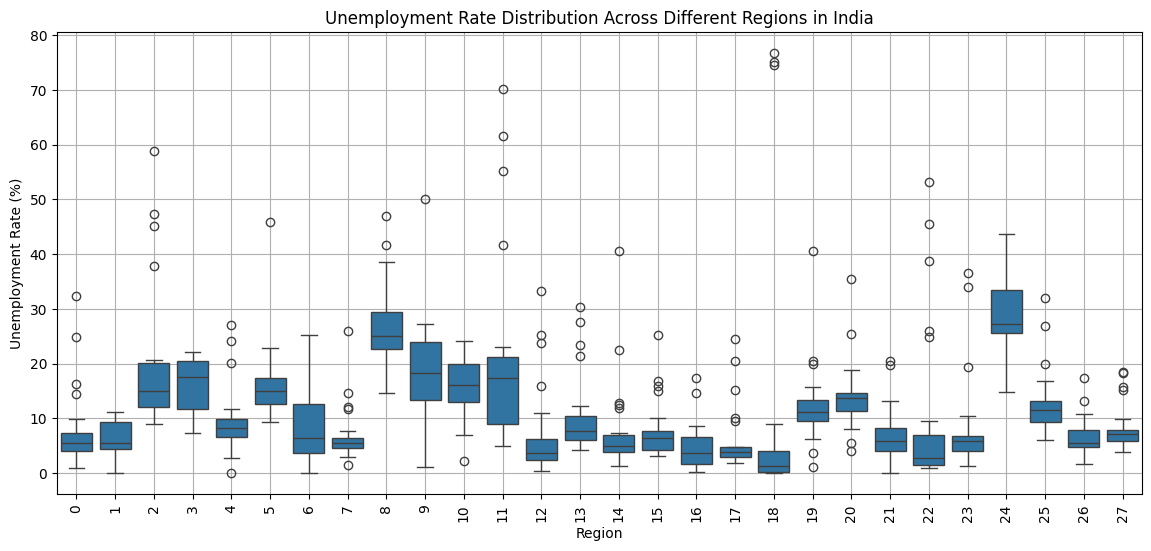

<ipython-input-5-b5157db8513d>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df, palette="coolwarm")


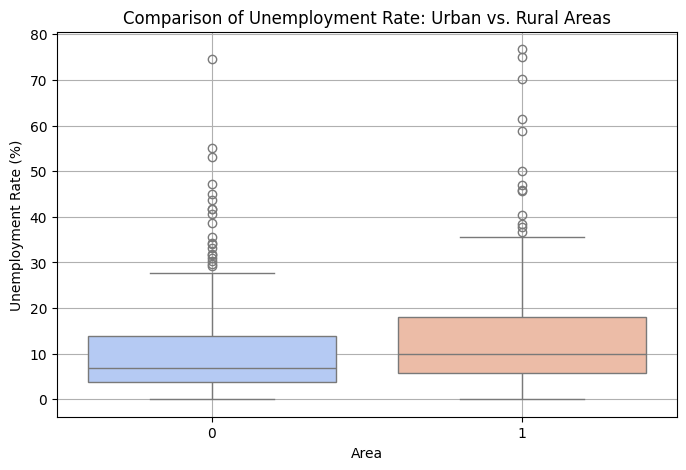

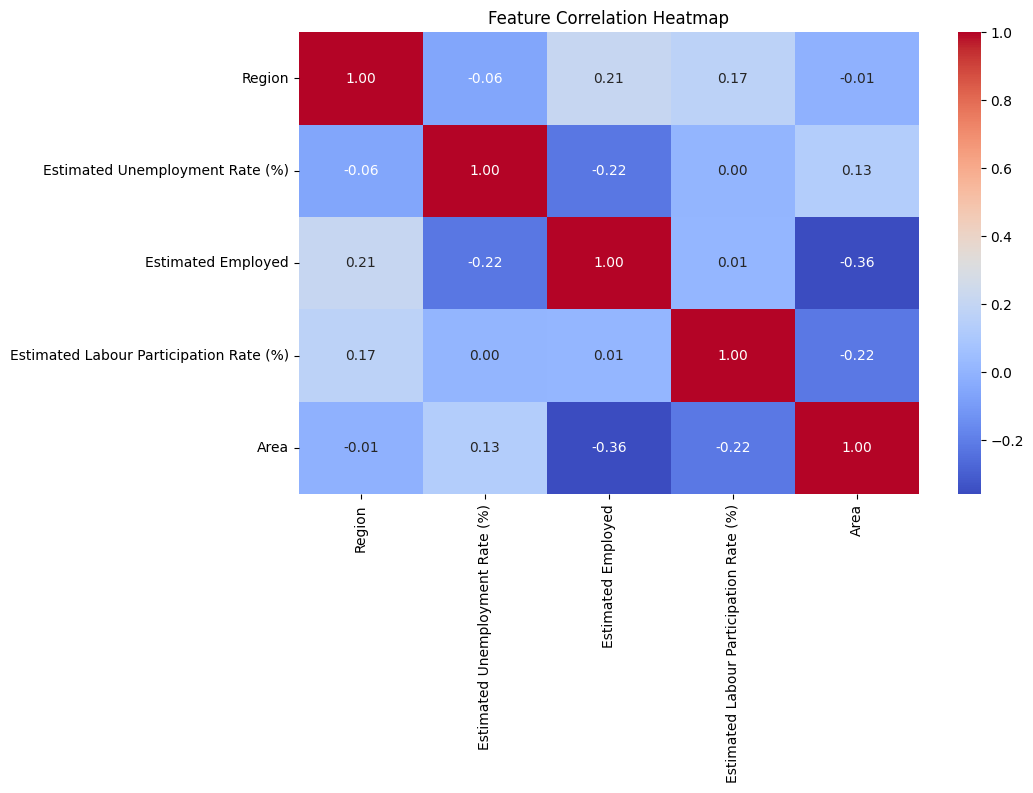

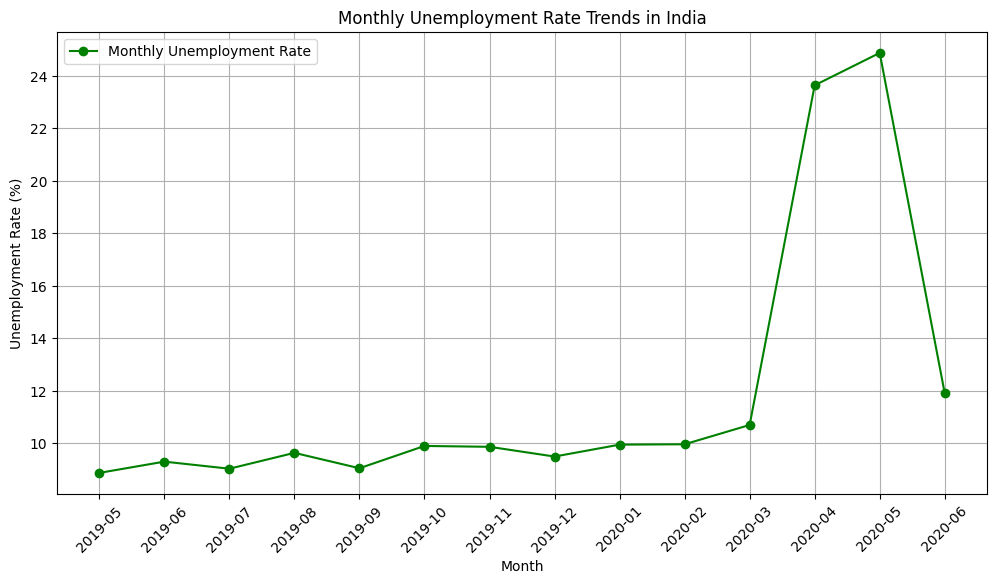

Model Performance Metrics:
Mean Absolute Error: 4.21
Mean Squared Error: 62.47
R2 Score: 0.57


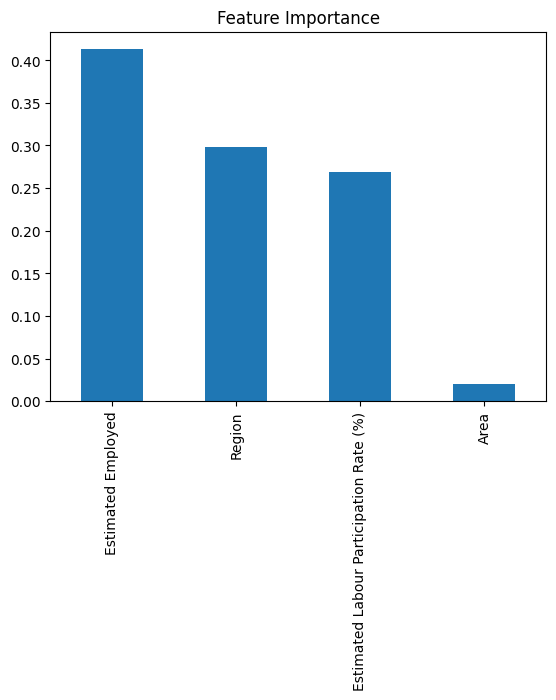

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/Unemployment in India.csv"
df = pd.read_csv(file_path)

# Cleaning column names
df.columns = df.columns.str.strip()

# Handling missing values
df = df.dropna().reset_index(drop=True)

# Convert Date to datetime format
df["Date"] = df["Date"].str.strip()
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# Label encoding categorical features
label_encoder = LabelEncoder()
df["Region"] = label_encoder.fit_transform(df["Region"])
df["Area"] = label_encoder.fit_transform(df["Area"])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
df_time_series = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean()
plt.plot(df_time_series, marker="o", linestyle="-", color="b", label="Avg. Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend Over Time in India")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Unemployment Rate by Region
plt.figure(figsize=(14, 6))
sns.boxplot(x="Region", y="Estimated Unemployment Rate (%)", data=df)
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Distribution Across Different Regions in India")
plt.grid(True)
plt.show()

# Urban vs Rural Unemployment Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df, palette="coolwarm")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.title("Comparison of Unemployment Rate: Urban vs. Rural Areas")
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Monthly Unemployment Rate Trends
plt.figure(figsize=(12, 6))
df["Month"] = df["Date"].dt.strftime('%Y-%m')
df_monthly = df.groupby("Month")["Estimated Unemployment Rate (%)"].mean()
plt.plot(df_monthly.index, df_monthly, marker="o", linestyle="-", color="g", label="Monthly Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.title("Monthly Unemployment Rate Trends in India")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Defining features and target
X = df[["Region", "Area", "Estimated Employed", "Estimated Labour Participation Rate (%)"]]
y = df["Estimated Unemployment Rate (%)"]

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Machine Learning Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()
